In [1]:
#pip install fast-ml

## Load library

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_duplicate_features
from imblearn.over_sampling import SMOTE

## Load Data

In [3]:
data = pd.read_csv('data.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

## Clean Data

## Check Duplicate

Duplicate Values

In [5]:
# detect duplicate features
duplicate_features = get_duplicate_features(data)
duplicate_features.head()

,Desc,feature1,feature2
0,Duplicate Values,Current Liabilities/Liability,Current Liability to Liability
1,Duplicate Values,Current Liabilities/Equity,Current Liability to Equity
2,Duplicate Index,Total income/Total expense,Cash Flow to Total Assets
3,Duplicate Index,Total income/Total expense,Cash Flow to Sales
4,Duplicate Index,Total income/Total expense,Working capitcal Turnover Rate


In [6]:
# all the duplicate features as list
duplicate_features_list = duplicate_features.query("Desc=='Duplicate Values'")['feature1'].to_list()
print(duplicate_features_list)

[' Current Liabilities/Liability', ' Current Liabilities/Equity']


In [7]:
# drop these duplicate features from dataset
print('Shape of Dataset before dropping the duplicate values features: ', data.shape)
data.drop(columns = duplicate_features_list, inplace=True)
print('Shape of Dataset after dropping the duplicate values features: ', data.shape)


Shape of Dataset before dropping the duplicate values features:  (6819, 96)
Shape of Dataset after dropping the duplicate values features:  (6819, 94)


Duplicate Index

In [8]:
# function to detect duplicate features
duplicate_features = get_duplicate_features(data)
duplicate_features.head(10)

,Desc,feature1,feature2
0,Duplicate Index,Debt ratio %,Net worth/Assets
1,Duplicate Index,Total income/Total expense,Net Income to Stockholder's Equity
2,Duplicate Index,Total expense/Assets,Cash Flow to Total Assets
3,Duplicate Index,Total expense/Assets,Current Liability to Equity
4,Duplicate Index,Total expense/Assets,Cash Flow to Sales
5,Duplicate Index,Total expense/Assets,Working capitcal Turnover Rate
6,Duplicate Index,Total income/Total expense,Equity to Liability
7,Duplicate Index,Total income/Total expense,Liability to Equity
8,Duplicate Index,Total income/Total expense,No-credit Interval
9,Duplicate Index,Total income/Total expense,Cash Flow to Sales


In [9]:
# all the duplicate features as list
duplicate_index_features_list = duplicate_features.query("Desc=='Duplicate Index'")['feature2'].to_list()
print(duplicate_index_features_list)

[' Net worth/Assets', " Net Income to Stockholder's Equity", ' Cash Flow to Total Assets', ' Current Liability to Equity', ' Cash Flow to Sales', ' Working capitcal Turnover Rate', ' Equity to Liability', ' Liability to Equity', ' No-credit Interval', ' Cash Flow to Sales', ' Net Income to Total Assets', ' Current Liability to Current Assets', ' Cash Flow to Equity', ' CFO to Assets', ' Cash Flow to Liability', ' Cash Flow to Total Assets', ' Cash Flow to Liability', ' CFO to Assets', ' Cash Flow to Equity', ' Current Liability to Current Assets', ' Net Income to Total Assets', ' No-credit Interval', " Net Income to Stockholder's Equity", ' Liability to Equity', ' Equity to Liability', ' Cash Flow to Sales', ' Current Liability to Equity', ' Cash Flow to Total Assets', ' Cash Flow to Liability', ' CFO to Assets', ' Cash Flow to Equity', ' Current Liability to Current Assets', ' Net Income to Total Assets', ' Current Liability to Equity', ' Working capitcal Turnover Rate', " Net Income 

In [10]:
# drop these duplicate features from dataset
print('Shape of Dataset before dropping the duplicate index features: ', data.shape)
data.drop(columns = duplicate_index_features_list, inplace=True)
print('Shape of Dataset after dropping the duplicate index features: ', data.shape)

Shape of Dataset before dropping the duplicate index features:  (6819, 94)
Shape of Dataset after dropping the duplicate index features:  (6819, 69)


## Check Null, Zero

A value equal to 0 is acceptable.

In [11]:
checkZero = data.eq(0).sum()
for key,value in checkZero.iteritems():
    print(key,",",value)

Bankrupt? , 6599
 ROA(C) before interest and depreciation before interest , 1
 ROA(A) before interest and % after tax , 1
 ROA(B) before interest and depreciation after tax , 1
 Operating Gross Margin , 1
 Realized Sales Gross Margin , 1
 Operating Profit Rate , 1
 Pre-tax net Interest Rate , 1
 After-tax net Interest Rate , 1
 Non-industry income and expenditure/revenue , 1
 Continuous interest rate (after tax) , 1
 Operating Expense Rate , 1
 Research and development expense rate , 1424
 Cash flow rate , 1
 Interest-bearing debt interest rate , 891
 Tax rate (A) , 2568
 Net Value Per Share (B) , 1
 Net Value Per Share (A) , 1
 Net Value Per Share (C) , 1
 Persistent EPS in the Last Four Seasons , 1
 Cash Flow Per Share , 1
 Revenue Per Share (Yuan ¥) , 2
 Operating Profit Per Share (Yuan ¥) , 1
 Per Share Net profit before tax (Yuan ¥) , 1
 Realized Sales Gross Profit Growth Rate , 1
 Operating Profit Growth Rate , 1
 After-tax Net Profit Growth Rate , 1
 Regular Net Profit Growth Ra

C:\Users\por24\AppData\Local\Temp\ipykernel_10456\1764113823.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,value in checkZero.iteritems():


This data don't have any null

In [12]:
checkNull = data.isnull().sum()
for key,value in checkNull.iteritems():
    print(key,",",value)

Bankrupt? , 0
 ROA(C) before interest and depreciation before interest , 0
 ROA(A) before interest and % after tax , 0
 ROA(B) before interest and depreciation after tax , 0
 Operating Gross Margin , 0
 Realized Sales Gross Margin , 0
 Operating Profit Rate , 0
 Pre-tax net Interest Rate , 0
 After-tax net Interest Rate , 0
 Non-industry income and expenditure/revenue , 0
 Continuous interest rate (after tax) , 0
 Operating Expense Rate , 0
 Research and development expense rate , 0
 Cash flow rate , 0
 Interest-bearing debt interest rate , 0
 Tax rate (A) , 0
 Net Value Per Share (B) , 0
 Net Value Per Share (A) , 0
 Net Value Per Share (C) , 0
 Persistent EPS in the Last Four Seasons , 0
 Cash Flow Per Share , 0
 Revenue Per Share (Yuan ¥) , 0
 Operating Profit Per Share (Yuan ¥) , 0
 Per Share Net profit before tax (Yuan ¥) , 0
 Realized Sales Gross Profit Growth Rate , 0
 Operating Profit Growth Rate , 0
 After-tax Net Profit Growth Rate , 0
 Regular Net Profit Growth Rate , 0
 Con

C:\Users\por24\AppData\Local\Temp\ipykernel_10456\3558008429.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,value in checkNull.iteritems():


## SMOTE Data

Text(0.5, 1.0, 'Target feature - Bankrupt?')

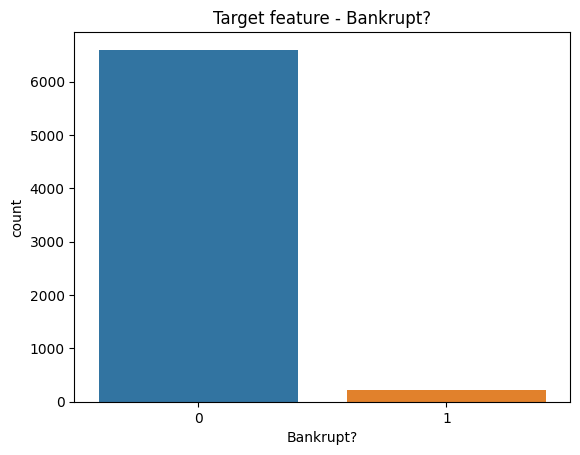

In [13]:
sns.countplot(x=data['Bankrupt?'])
plt.title('Target feature - Bankrupt?')

In [14]:
X = data.drop(columns=['Bankrupt?'])


Divide column A of X into y.

In [15]:
y = data['Bankrupt?']

Divide the data to be SMOTE and data for test.

In [16]:
X_Will_SM, X_test, y_Will_SM, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=1)


In [17]:
sm = SMOTE(random_state=1)

X_sm, y_sm = sm.fit_resample(X_Will_SM, y_Will_SM)

print('balance of 1 and 0 classes:')
y_sm.value_counts()

balance of 1 and 0 classes:


0    3962
1    3962
Name: Bankrupt?, dtype: int64

data types 0 and 1 are balance

Text(0.5, 1.0, 'Target feature - Bankrupt?')

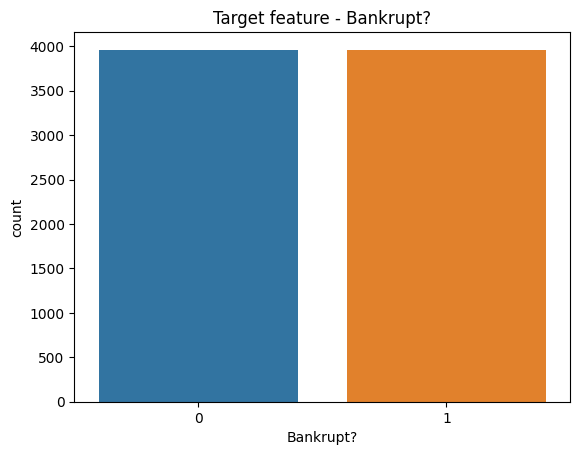

In [18]:
sns.countplot(x=y_sm)
plt.title('Target feature - Bankrupt?')

## Correlation

Use Correlation Coefficient to select feature

In [19]:
X_sm.insert(loc = 0, column="Bankrupt", value= y_sm)

In [20]:
X_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7924 entries, 0 to 7923
Data columns (total 69 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt                                                  7924 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  7924 non-null   float64
 2    ROA(A) before interest and % after tax                   7924 non-null   float64
 3    ROA(B) before interest and depreciation after tax        7924 non-null   float64
 4    Operating Gross Margin                                   7924 non-null   float64
 5    Realized Sales Gross Margin                              7924 non-null   float64
 6    Operating Profit Rate                                    7924 non-null   float64
 7    Pre-tax net Interest Rate                                7924 non-null   float64
 8    After-tax net Int

In [21]:
corr = X_sm.corr()
print(corr)

                                                    Bankrupt  \
Bankrupt                                            1.000000   
 ROA(C) before interest and depreciation before... -0.579195   
 ROA(A) before interest and % after tax            -0.559880   
 ROA(B) before interest and depreciation after tax -0.572513   
 Operating Gross Margin                            -0.366444   
...                                                      ...   
 Liability-Assets Flag                              0.038945   
 Total assets to GNP price                          0.062257   
 Gross Profit to Sales                             -0.366455   
 Degree of Financial Leverage (DFL)                 0.027810   
 Net Income Flag                                         NaN   

                                                     ROA(C) before interest and depreciation before interest  \
Bankrupt                                                                                    -0.579195          
 ROA(C)

But Graph correlation too large

C:\Users\por24\AppData\Local\Temp\ipykernel_10456\1902598407.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data.columns)


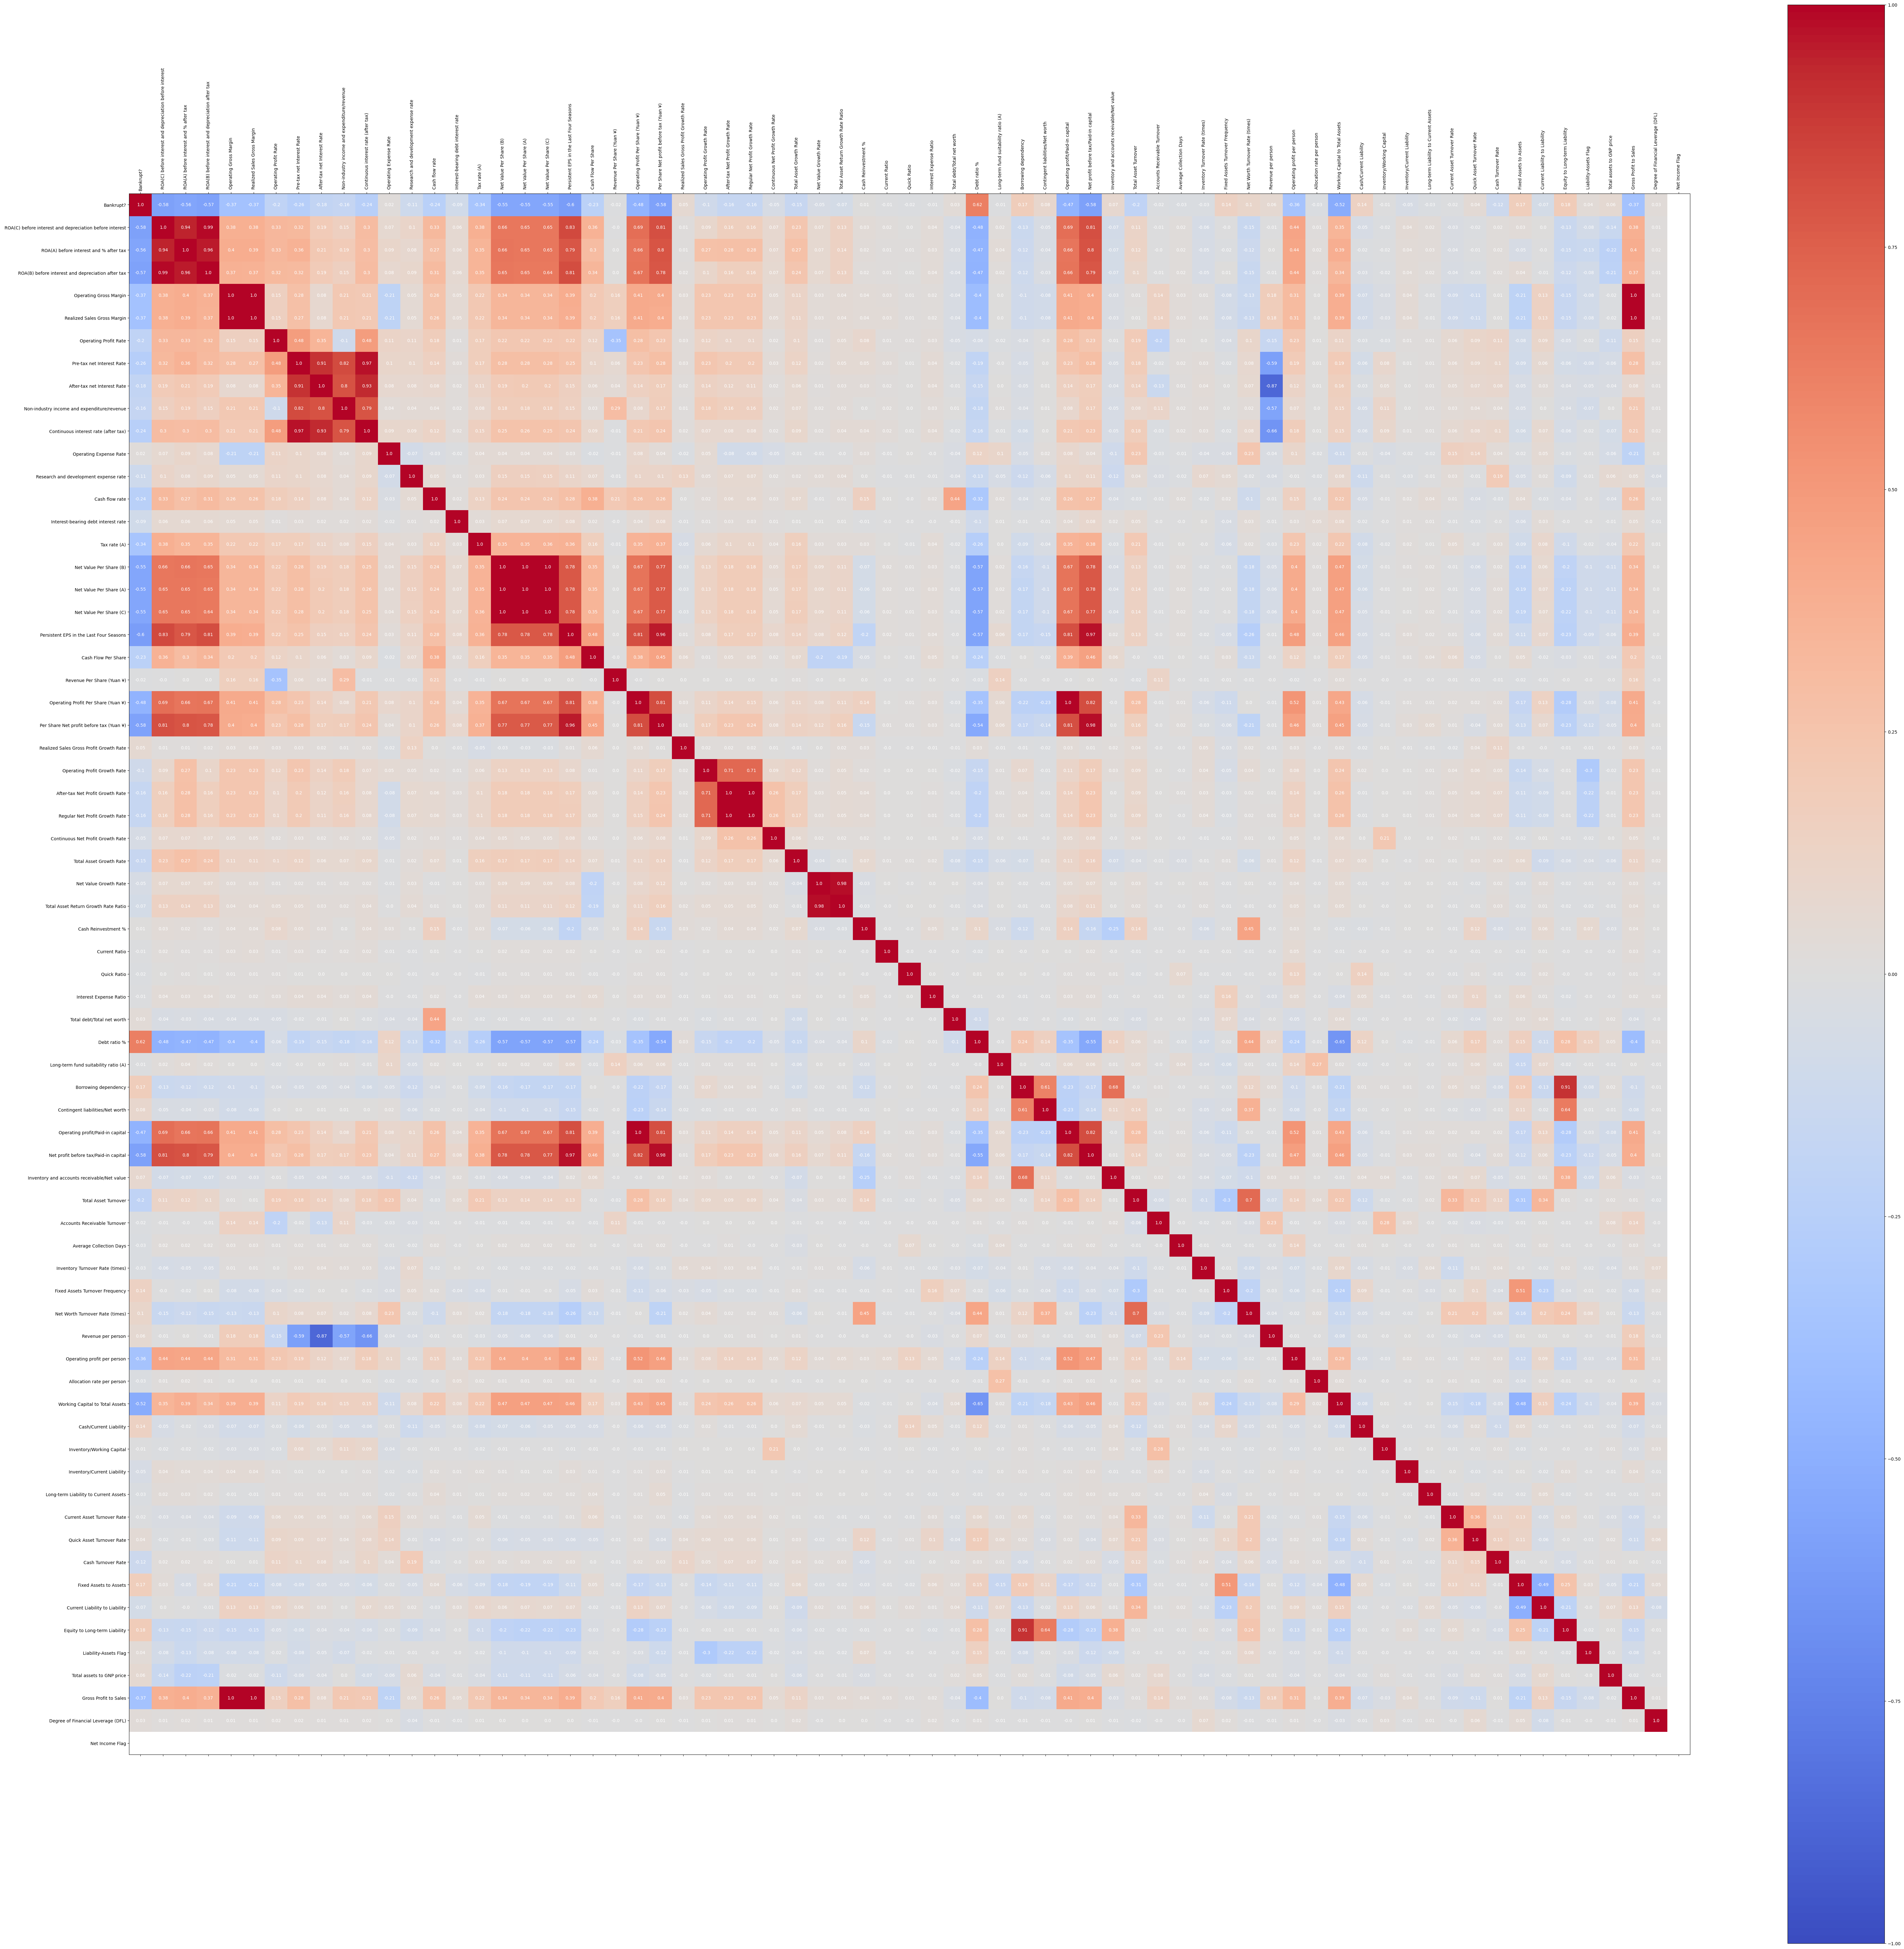

In [22]:
crm = corr

fig, ax = plt.subplots(figsize=(80, 80))
cax = ax.matshow(crm,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
ax.set_xticklabels(data.columns)
plt.xticks(rotation = 90)
ax.set_yticklabels(data.columns)
ax.set_yticks(ticks)

for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        text = ax.text(j, i, round(crm.iloc[i][j],2),
        ha="center", va="center", color="w")
plt.show()

So we use csv to analyze correlation.
 



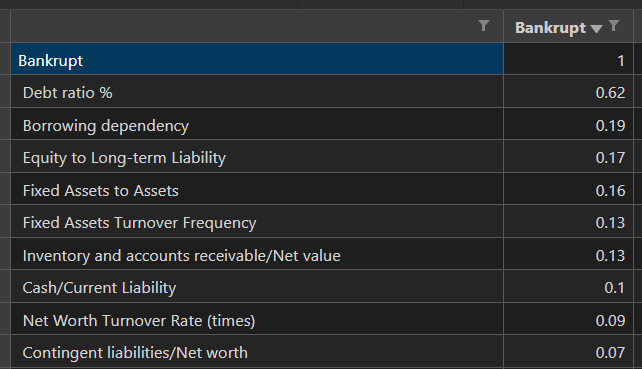

In [23]:
X_sm.corr().to_csv("correlation.csv")

top correlation

        - " Debt ratio %",
        - " Borrowing dependency",
        - " Equity to Long-term Liability",
        - " Fixed Assets to Assets",

In [24]:
X_sm =X_sm.drop(columns=['Bankrupt'])


## Model

In [25]:
X_train  =  X_sm[[
                " Debt ratio %",
                " Borrowing dependency",
                " Equity to Long-term Liability",
                " Fixed Assets to Assets",
            ]]
X_train.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7924 entries, 0 to 7923
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    Debt ratio %                   7924 non-null   float64
 1    Borrowing dependency           7924 non-null   float64
 2    Equity to Long-term Liability  7924 non-null   float64
 3    Fixed Assets to Assets         7924 non-null   float64
dtypes: float64(4)
memory usage: 247.8 KB


In [26]:
X_test =  X_test[[
                " Debt ratio %",
                " Borrowing dependency",
                " Equity to Long-term Liability",
                " Fixed Assets to Assets",
            ]]


X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 6002 to 3469
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    Debt ratio %                   1364 non-null   float64
 1    Borrowing dependency           1364 non-null   float64
 2    Equity to Long-term Liability  1364 non-null   float64
 3    Fixed Assets to Assets         1364 non-null   float64
dtypes: float64(4)
memory usage: 53.3 KB


test data

In [27]:
X_valid = X_valid[[
                " Debt ratio %",
                " Borrowing dependency",
                " Equity to Long-term Liability",
                " Fixed Assets to Assets",
            ]]

X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 4493 to 4396
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    Debt ratio %                   1364 non-null   float64
 1    Borrowing dependency           1364 non-null   float64
 2    Equity to Long-term Liability  1364 non-null   float64
 3    Fixed Assets to Assets         1364 non-null   float64
dtypes: float64(4)
memory usage: 53.3 KB


In [28]:
y_train = y_sm
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7924 entries, 0 to 7923
Series name: Bankrupt?
Non-Null Count  Dtype
--------------  -----
7924 non-null   int64
dtypes: int64(1)
memory usage: 62.0 KB


In [29]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 1364 entries, 6002 to 3469
Series name: Bankrupt?
Non-Null Count  Dtype
--------------  -----
1364 non-null   int64
dtypes: int64(1)
memory usage: 21.3 KB


In [30]:
y_valid.info()

<class 'pandas.core.series.Series'>
Int64Index: 1364 entries, 4493 to 4396
Series name: Bankrupt?
Non-Null Count  Dtype
--------------  -----
1364 non-null   int64
dtypes: int64(1)
memory usage: 21.3 KB


Use GridSearchCV to find best parameter

```python

param= {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 1,2,5,6,10,12,15,18,20],
    'min_samples_split': [2, 5, 7],
    'class_weight': ['balanced', None],
    'random_state' :[1]
}

rf = RandomForestClassifier()
model = GridSearchCV(estimator=rf, param_grid=param)
model.fit(X_train, y_train)

print("best parameters: ",model.best_params_)

model = model.best_estimator_
y_pred = model.predict(X_valid)

print("f1 score is %.2f" % f1_score(y_valid, y_pred))
print("Precision: %.2f" % precision_score(y_valid, y_pred))
print("Recall: %.2f" % recall_score(y_valid, y_pred))
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
cm = confusion_matrix(y_valid, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()
```


### LogisticRegression

Recall: 0.79
Accuracy: 76.98%


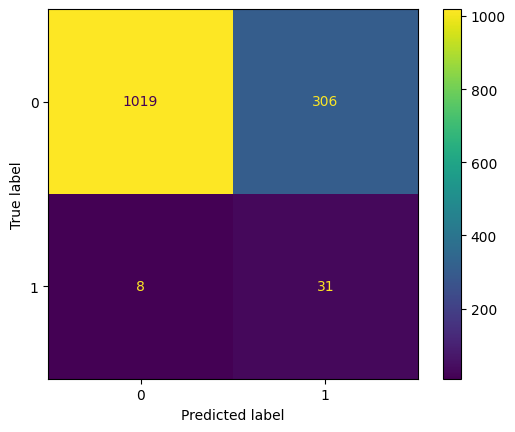

In [31]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Recall: %.2f" % recall_score(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()

### DecisionTreeClassifier

Recall: 0.49
Accuracy: 83.94%


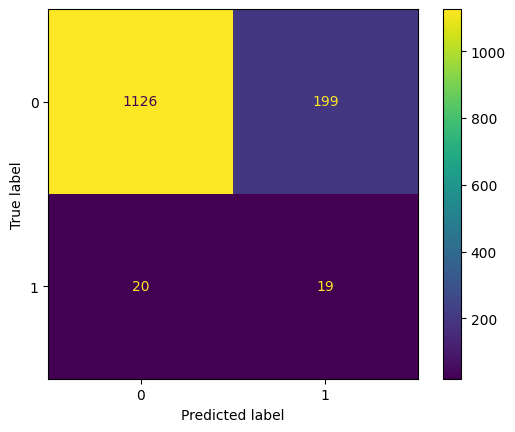

In [32]:
model = DecisionTreeClassifier(max_depth=15, random_state = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Recall: %.2f" % recall_score(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()


### RandomForestClassifier

Recall: 0.62
Accuracy: 86.73%


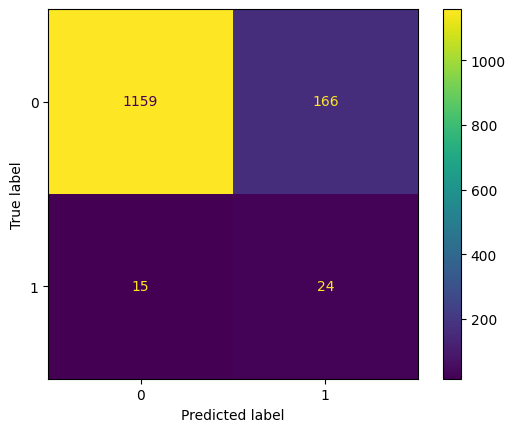

In [33]:
model = RandomForestClassifier(class_weight=None, max_depth= 15, min_samples_split =  7, n_estimators =  30, random_state = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Recall: %.2f" % recall_score(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()


### XGBootClassifier

Recall: 0.69
Accuracy: 83.06% 


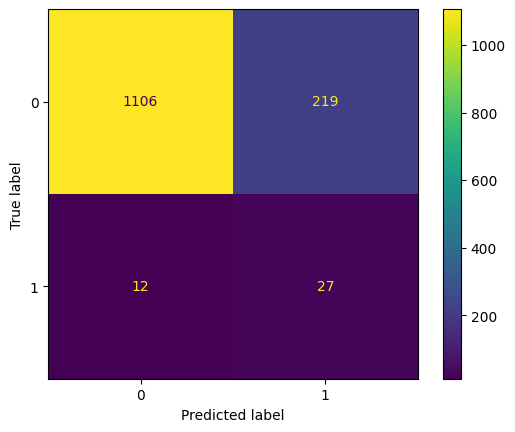

In [34]:
model = XGBClassifier(colsample_bytree =  0.7, learning_rate=  0.1, max_depth = 10, n_estimators=  30, subsample=  0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Recall: %.2f" % recall_score(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%% " % (accuracy * 100.0))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()


### Support Vector Classification

Recall: 76.92%
Accuracy: 76.98% 


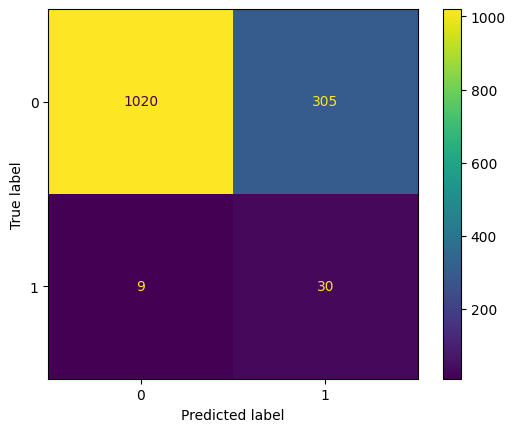

In [35]:
model = SVC(degree = 1, gamma = 1, kernel = 'rbf', random_state = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Recall: %.2f%%" % (recall_score(y_test, y_pred) * 100.0))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%% " % (accuracy * 100.0))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()

# Finally, we came up with a LogisticRegression model that gave the best recall values.

LogisticRegression 

Form test dataset 1364 sample   

Confusion Matrix
- true positives 31
- false positives 8
- true negative 1019
- false negative 306

Prefromance
- Recall = 79%
- Accuracy = 76.98%



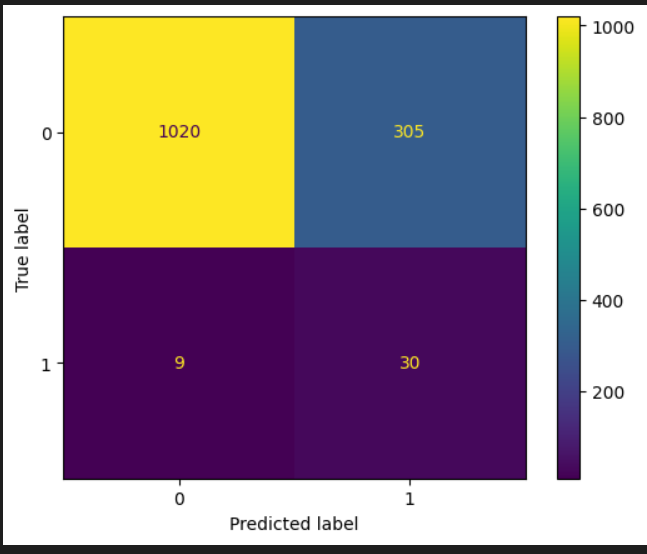

Code for predict your company

In [36]:
Debt_ratio = float(input('Debt ratio (0-1): '))
Borrowing_dependency = float(input('Borrowing dependency (0-1): '))
Equity_to_Long_term_Liability = float(input('Equity to Long-term Liability (0-1): '))
Fixed_Assets_to_Assets = float(input('Fixed_Assets to Assets (0-1): '))

model = linear_model.LogisticRegression()
model.fit(X_train.values, y_train)
y_pred = model.predict([[Debt_ratio, Borrowing_dependency, Equity_to_Long_term_Liability, Fixed_Assets_to_Assets]])

if y_pred == 0 :
    print("Your company doesn't look bankrupt yet.")
else :
    print("Your company has a chance of going bankrupt.")


Your company doesn't look bankrupt yet.
